In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'ATOM'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-28,8.6892,8.8233,8.4614,8.7192,8.7192,159284737
2024-05-29,8.7192,8.8887,8.6217,8.6263,8.6263,156944111
2024-05-30,8.6263,8.7089,8.4035,8.5457,8.5457,117538598
2024-05-31,8.5457,8.5457,8.2490,8.3063,8.3063,100282397
2024-06-01,8.3063,8.3630,8.2591,8.3240,8.3240,64074320


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

8.324

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997146,0.995805,0.993416,0.993416,0.693466
High,0.997146,1.000000,0.994631,0.997148,0.997148,0.720621
Low,0.995805,0.994631,1.000000,0.996231,0.996231,0.670093
Close,0.993416,0.997148,0.996231,1.000000,1.000000,0.703540
Adj Close,0.993416,0.997148,0.996231,1.000000,1.000000,0.703540
Volume,0.693466,0.720621,0.670093,0.703540,0.703540,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2019-03-14,6.526642,7318172
2019-03-15,7.504351,6057301
2019-03-16,7.383882,3477393
2019-03-17,4.776164,2653565
2019-03-18,5.110341,2567201
...,...,...
2024-05-28,8.719200,159284737
2024-05-29,8.626300,156944111
2024-05-30,8.545700,117538598


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2019-05-02,4.594658,83803871,3.923099,4.221030,4.288250
2019-05-03,5.310845,161847461,4.041971,4.272493,4.263934
2019-05-04,5.259992,164883490,4.204301,4.322916,4.219047
2019-05-05,4.853705,68292315,4.359221,4.357759,4.168443
2019-05-06,4.725382,63030290,4.468416,4.367026,4.167428


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-28,8.7192,159284737,8.557785,8.638040,8.694896
2024-05-29,8.6263,156944111,8.599518,8.653751,8.650714
2024-05-30,8.5457,117538598,8.561869,8.656376,8.605412
2024-05-31,8.3063,100282397,8.514252,8.641832,8.556435
2024-06-01,8.3240,64074320,8.491079,8.630912,8.535169


<Axes: xlabel='Date'>

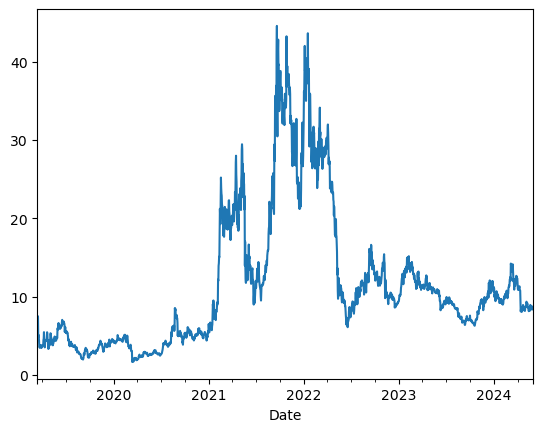

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2019-03-14,6.526642,7318172
1,2019-03-15,7.504351,6057301
2,2019-03-16,7.383882,3477393
3,2019-03-17,4.776164,2653565
4,2019-03-18,5.110341,2567201
...,...,...,...
1902,2024-05-28,8.719200,159284737
1903,2024-05-29,8.626300,156944111
1904,2024-05-30,8.545700,117538598
1905,2024-05-31,8.306300,100282397


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:59 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
1992,2024-08-26
1993,2024-08-27
1994,2024-08-28
1995,2024-08-29
1996,2024-08-30


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1967,2024-08-01,7.593634,0.559759,8.621404,6.971916,8.084852,-3.138207,-3.138207,-3.138207,-0.019167,-0.019167,-0.019167,-3.119040,-3.119040,-3.119040,0.0,0.0,0.0,4.455427
1968,2024-08-02,7.587571,0.160591,8.651721,6.942596,8.098998,-3.026232,-3.026232,-3.026232,0.033419,0.033419,0.033419,-3.059650,-3.059650,-3.059650,0.0,0.0,0.0,4.561339
1969,2024-08-03,7.581508,0.359550,8.702708,6.924555,8.111877,-2.947653,-2.947653,-2.947653,0.043961,0.043961,0.043961,-2.991615,-2.991615,-2.991615,0.0,0.0,0.0,4.633854
1970,2024-08-04,7.575445,0.720476,9.287353,6.906573,8.124683,-2.868569,-2.868569,-2.868569,0.047512,0.047512,0.047512,-2.916082,-2.916082,-2.916082,0.0,0.0,0.0,4.706876
1971,2024-08-05,7.569382,0.672067,8.877870,6.888037,8.135366,-2.850831,-2.850831,-2.850831,-0.016459,-0.016459,-0.016459,-2.834372,-2.834372,-2.834372,0.0,0.0,0.0,4.718551
1972,2024-08-06,7.563319,0.485975,8.937851,6.846415,8.151353,-2.788616,-2.788616,-2.788616,-0.040679,-0.040679,-0.040679,-2.747937,-2.747937,-2.747937,0.0,0.0,0.0,4.774703
1973,2024-08-07,7.557256,0.547953,9.073680,6.825209,8.155950,-2.706901,-2.706901,-2.706901,-0.048588,-0.048588,-0.048588,-2.658313,-2.658313,-2.658313,0.0,0.0,0.0,4.850355
1974,2024-08-08,7.551193,0.817203,9.081895,6.807178,8.166090,-2.586237,-2.586237,-2.586237,-0.019167,-0.019167,-0.019167,-2.567070,-2.567070,-2.567070,0.0,0.0,0.0,4.964956
1975,2024-08-09,7.545130,0.887208,9.296046,6.792763,8.168294,-2.442344,-2.442344,-2.442344,0.033419,0.033419,0.033419,-2.475763,-2.475763,-2.475763,0.0,0.0,0.0,5.102786
1976,2024-08-10,7.539067,0.860758,9.224432,6.768518,8.179756,-2.341918,-2.341918,-2.341918,0.043961,0.043961,0.043961,-2.385879,-2.385879,-2.385879,0.0,0.0,0.0,5.197150


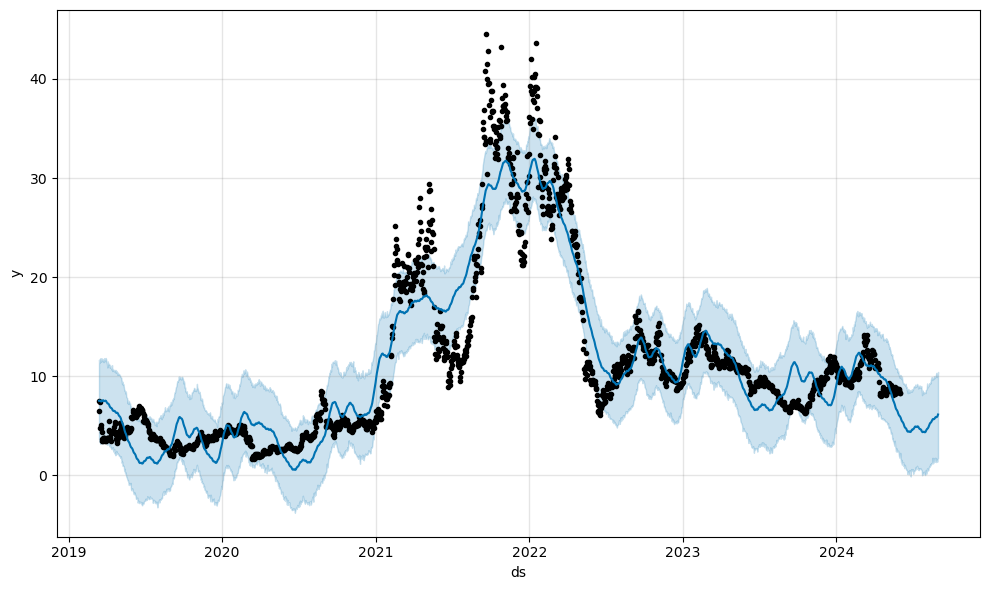

In [20]:
# Plot the Prophet predictions for the data
fig_forecast = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-06-02,5.833919,1.697243,10.107142
2024-06-03,5.685146,1.322927,9.881432
2024-06-04,5.574920,1.587152,9.698982
2024-06-05,5.479718,1.085829,9.985019
2024-06-06,5.420640,1.289581,9.639407
...,...,...,...
2024-08-26,5.874217,1.445551,10.346732
2024-08-27,5.892400,1.670471,10.250174
2024-08-28,5.935345,1.379438,9.929212


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

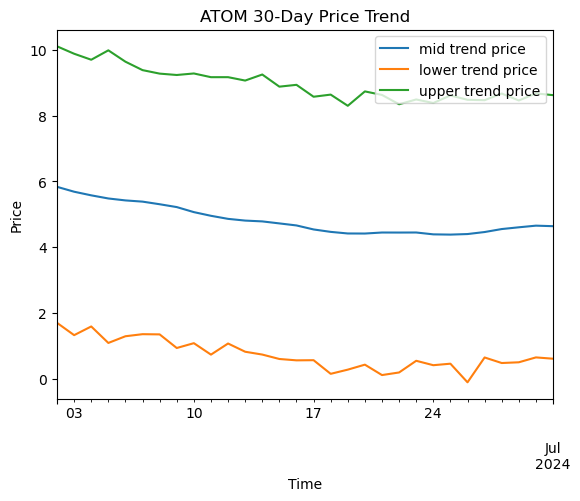

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

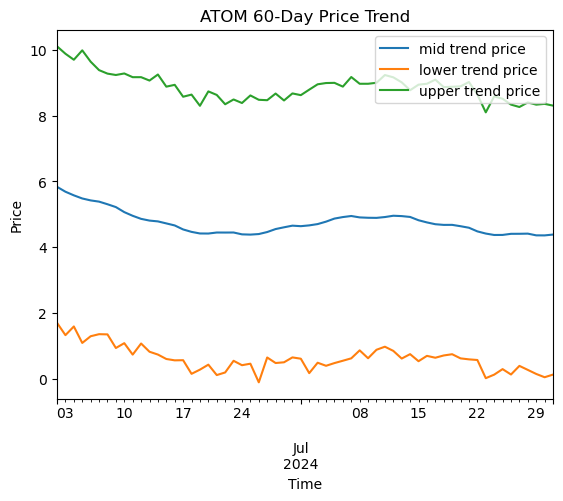

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

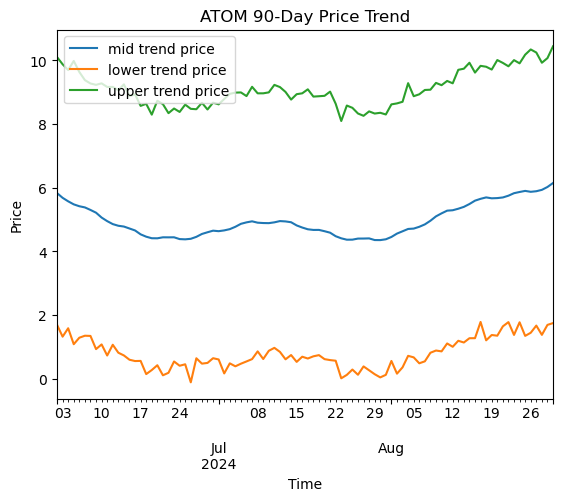

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.savefig(f'{crypto}_90d_trend_forecast', bbox_inches = 'tight')
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

8.324

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

5.833919404927904

In [29]:
# Calculate tommorrow's weighted price
wp = last_close_price*.5 + tommorow_mid_trend_price*.5
wp

7.078959702463952

In [30]:
# Retreive tomorrow's weighted trend price forecast
tommorow_mid_trend_price = ((crypto_forecast['mid trend price'].iloc[-90]*.6)+(crypto_forecast['upper trend price'].iloc[-90]*.2)+(crypto_forecast['lower trend price'].iloc[-90]*.2))
tommorow_mid_trend_price

5.861228743201161

In [31]:
# Retrieve weighted trend price in 30 days
mid_trend_price_in_30 = ((crypto_forecast['mid trend price'].iloc[-60]*.6)+(crypto_forecast['upper trend price'].iloc[-60]*.2)+(crypto_forecast['lower trend price'].iloc[-60]*.2))
mid_trend_price_in_30

4.588322259023082

In [32]:
# Retrieve weighted trend price in 60 days
mid_trend_price_in_60 = ((crypto_forecast['mid trend price'].iloc[-30]*.6)+(crypto_forecast['upper trend price'].iloc[-30]*.2)+(crypto_forecast['lower trend price'].iloc[-30]*.2))
mid_trend_price_in_60

4.50948856195383

In [33]:
# Retrieve weighted trend price in 90 days
mid_trend_price_in_90 = ((crypto_forecast['mid trend price'].iloc[-1]*.6)+(crypto_forecast['upper trend price'].iloc[-1]*.2)+(crypto_forecast['lower trend price'].iloc[-1]*.2))
mid_trend_price_in_90

6.128945660267778

In [34]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
#percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30 = ((mid_trend_price_in_30)/(wp))-1
percent_diff_30.round(3)

-0.352

In [35]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
#percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60 = ((mid_trend_price_in_60)/(wp))-1
percent_diff_60.round(3)

-0.363

In [36]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
#percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90 = ((mid_trend_price_in_90)/(wp))-1
percent_diff_90.round(3)

-0.134

In [37]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

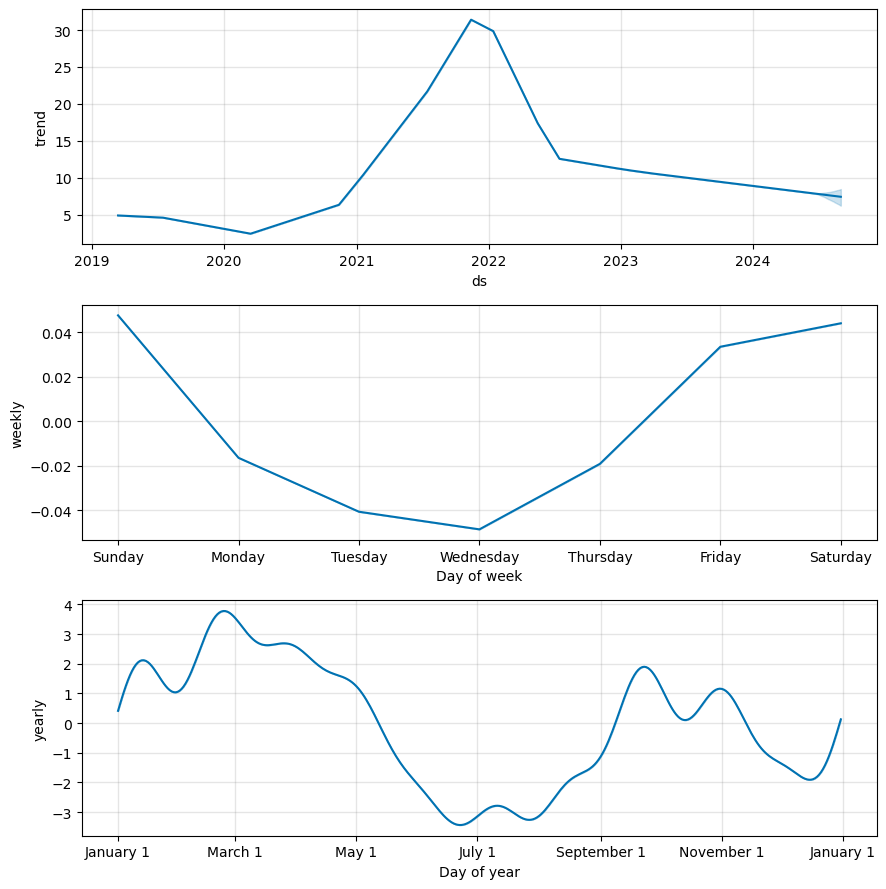

In [38]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig_comp = crypto_model.plot_components(crypto_forecast)
plt.savefig(f'{crypto}_components.png', bbox_inches = 'tight')

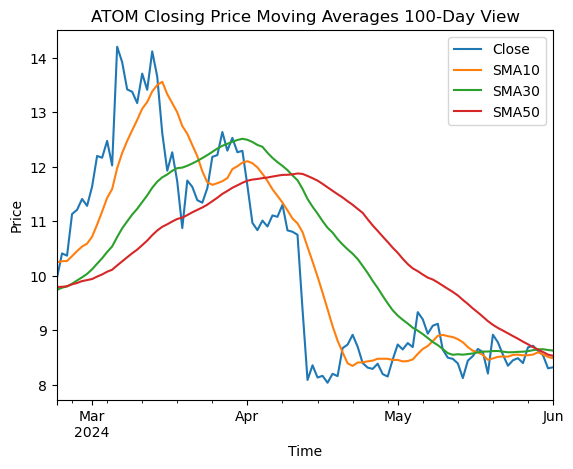

In [39]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

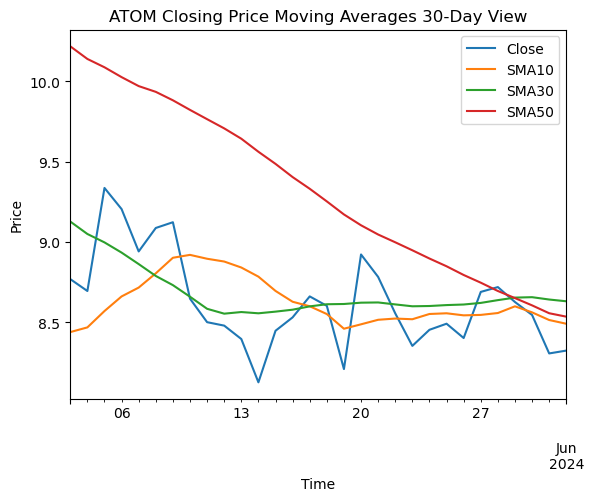

In [40]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.savefig(f'{crypto}_30d_MA_view.png', bbox_inches = 'tight')
plt.show()

In [41]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-06-02
File created :  2024-06-02.csv


In [42]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [43]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.449975,-0.10901631551481594,-0.11092059991991376,0.3509869614670582
ATOM,8.324,-0.33991694590791044,-0.3714581211536879,-0.1364866156068958
AVAX,35.76,-0.18209253217532206,-0.11091103505461575,0.08171603105696135
BNB,601.3,-0.23364934433493878,-0.1940545909823247,-0.15012398429900753
BONK,3.3e-05,0.0869994207211342,0.214013556994614,0.32649958564761183
BTC,67706.94,-0.11245843916078024,-0.06653480305698356,-0.05114734665447629
DOGE,0.1602,-0.22746720928706532,-0.2069470666925296,-0.08220738687268558
ETH,3813.2,-0.14210837945909027,-0.07466875734312517,-0.04156040932743599
PEPE,1.5e-05,0.10018396725609113,0.2973887016051089,0.48986599086615756
SHIB,2.5e-05,-0.02223985209917234,0.000567920808088429,0.016601454860916798
SOL,166.03,0.08268635494333143,0.16519430794776246,0.2856162325196754
TRX,0.112478,0.047611408863998284,0.06586311567622971,0.11520707579434442
TURBO,0.006987,-0.2950330177445859,-0.14810273834767862,0.023692560414227293
WIF,3.2756,-0.027545615271177937,-0.0076651111